# Handwritten Digit Recognition
Digit recognition system is the working of a machine to train itself for recognizing the digits from different sources like emails, bank cheque, papers, images, etc. and in different real-world scenarios for online handwriting recognition on computer tablets or system. Developing such a system includes a machine to understand and classify the images of handwritten digits as 10 digits (0–9). Handwritten digits from the MNIST database has been one of the most famous databases among the machine learning community for many recent decades.

__Question:__
Use MNIST dataset to create a classifier for all the 10 digits. First implement the classifier by squeezing the image into a vector and then using a MLP. Now, try the same task using a different machine learning classifier such as an SVM to check the gain in performance by using perceptrons as compared to conventional machine learning techniques.


In [1]:
# Importing Libarires 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from sklearn.datasets import load_digits
from sklearn import preprocessing 
from collections import Counter 
from skimage.feature import hog
import warnings
warnings.filterwarnings('ignore')

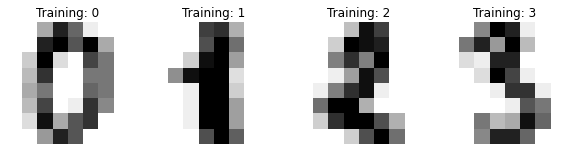

In [2]:
digits =load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [3]:
n_samples = len(digits.images)

In [4]:
data = digits.images.reshape((n_samples,-1))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [6]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [7]:
Model = MLPClassifier(activation='relu', hidden_layer_sizes=(200, 200), alpha = 0.3)
Model.fit(X_train, y_train)

MLPClassifier(alpha=0.3, hidden_layer_sizes=(200, 200))

In [8]:
print("Training Score :: {}\n".format(Model.score(X_train, y_train)))
print("Testing Score :: {}\n".format(Model.score(X_test, y_test)))

Training Score :: 1.0

Testing Score :: 0.9432703003337041



In [9]:
predicted = Model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,plot_confusion_matrix

In [11]:
confusion_matrix(y_test,predicted)

array([[85,  0,  1,  1,  1,  0,  0,  0,  0,  0],
       [ 0, 83,  0,  1,  0,  0,  0,  0,  1,  6],
       [ 0,  0, 86,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 78,  0,  4,  0,  3,  6,  0],
       [ 0,  0,  0,  0, 84,  0,  4,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 86,  1,  0,  0,  4],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 88,  1,  0],
       [ 0,  4,  0,  0,  0,  2,  1,  0, 80,  1],
       [ 1,  0,  0,  0,  0,  2,  0,  0,  1, 88]], dtype=int64)

In [12]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        88
           1       0.94      0.91      0.93        91
           2       0.99      1.00      0.99        86
           3       0.97      0.86      0.91        91
           4       0.99      0.91      0.95        92
           5       0.91      0.95      0.93        91
           6       0.94      0.99      0.96        91
           7       0.97      0.99      0.98        89
           8       0.90      0.91      0.90        88
           9       0.85      0.96      0.90        92

    accuracy                           0.94       899
   macro avg       0.95      0.94      0.94       899
weighted avg       0.95      0.94      0.94       899



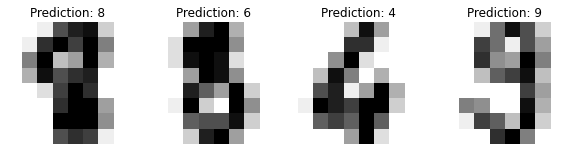

In [13]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Confusion matrix:
[[85  0  1  1  1  0  0  0  0  0]
 [ 0 83  0  1  0  0  0  0  1  6]
 [ 0  0 86  0  0  0  0  0  0  0]
 [ 0  0  0 78  0  4  0  3  6  0]
 [ 0  0  0  0 84  0  4  0  0  4]
 [ 0  0  0  0  0 86  1  0  0  4]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  4  0  0  0  2  1  0 80  1]
 [ 1  0  0  0  0  2  0  0  1 88]]


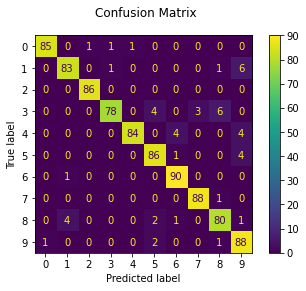

In [14]:
disp = plot_confusion_matrix(Model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [15]:
from sklearn.svm import SVC

In [16]:
clf = SVC(gamma=0.001)

In [17]:
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



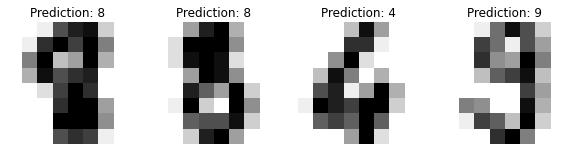

In [19]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf2 = DecisionTreeClassifier()

In [22]:
clf2.fit(X_train,y_train)
pred2 = clf2.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        88
           1       0.77      0.59      0.67        91
           2       0.91      0.70      0.79        86
           3       0.64      0.73      0.68        91
           4       0.77      0.78      0.77        92
           5       0.60      0.75      0.66        91
           6       0.86      0.87      0.86        91
           7       0.88      0.66      0.76        89
           8       0.55      0.64      0.59        88
           9       0.66      0.76      0.71        92

    accuracy                           0.74       899
   macro avg       0.76      0.74      0.74       899
weighted avg       0.75      0.74      0.74       899



In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
clf3 = RandomForestClassifier()
clf3.fit(X_train,y_train)
pred3 = clf3.predict(X_test)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.95      0.89      0.92        91
           2       1.00      0.91      0.95        86
           3       0.86      0.87      0.86        91
           4       0.98      0.90      0.94        92
           5       0.90      0.93      0.92        91
           6       0.97      0.99      0.98        91
           7       0.95      0.98      0.96        89
           8       0.91      0.89      0.90        88
           9       0.86      0.97      0.91        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899



In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf4 = LogisticRegression()
clf4.fit(X_train,y_train)
pred4 = clf4.predict(X_test)
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.94      0.90      0.92        91
           2       0.99      0.98      0.98        86
           3       0.94      0.84      0.88        91
           4       0.98      0.91      0.94        92
           5       0.88      0.95      0.91        91
           6       0.91      0.99      0.95        91
           7       0.98      0.96      0.97        89
           8       0.89      0.90      0.89        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899

